<a href="https://colab.research.google.com/github/aju57/Machine-Learning-Projects/blob/main/Stock_Buy_Sell_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
df=quandl.get('NSE/TATAGLOBAL')

In [4]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


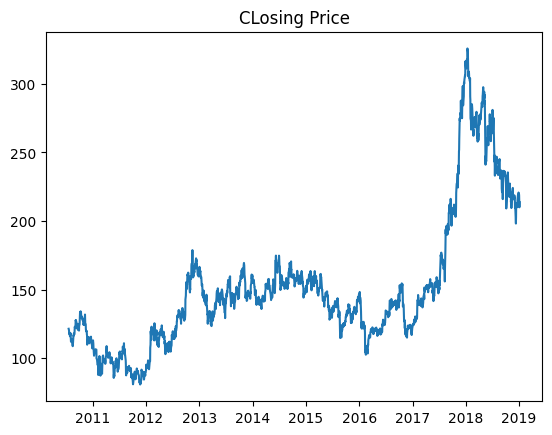

In [7]:
plt.plot(df['Close'])
plt.title('CLosing Price')
plt.show()

In [9]:
df=df.dropna()
df['Open - Close']=df['Open']-df['Close']
df['High - Low']=df['High']-df['Low']


**This is done to generate two new feature to predict whether we should buy or sell the stock.**

In [10]:
X=df[['Open - Close','High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [12]:
Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
Y

array([-1, -1, -1, ..., -1,  1, -1])

**Generating the output label where +1 indicates BUY option and -1 indicates sell option.**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

para={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,para,cv=5,scoring='accuracy')

model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='accuracy')

In [25]:
accuracy_train=accuracy_score(y_train,model.predict(X_train))
accuracy_test=accuracy_score(y_test,model.predict(X_test))

print(f" The accuracy on training set is {accuracy_train}")
print(f" The accuracy on test set is {accuracy_test}")

 The accuracy on training set is 0.6234920634920635
 The accuracy on test set is 0.518095238095238


In [28]:
predicted_class=model.predict(X_test)

In [31]:
actual_predicted=pd.DataFrame({'Actual Class':y_test,'Predicted Class':predicted_class})
actual_predicted

,Actual Class,Predicted Class
0,1,-1
1,1,1
2,-1,-1
3,1,1
4,1,1
...,...,...
520,-1,-1
521,-1,1
522,1,1
523,1,-1
